<h1 style="background-color: #1F74BA; color: white; padding: 10px; border-radius: 8px; text-align: center;">
Customer Sentiment Analysis - Flipkart
</h1>


# <span style="background-color: white; color: #1F74BA; padding: 5px; border-radius: 5px;">Objective:</span>

As a **Data Analyst** at Flipkart, you have been tasked with gauging customer sentiment towards the **iPhone 16 128GB** model. The primary goal of this project is to analyze public perception and evaluate customer reactions by performing sentiment analysis on product reviews posted by users. By extracting and processing customer reviews, **you will derive insights about the overall sentiment (positive or negative) surrounding the product**, which can be useful for decision-making, improving customer experience, and identifying key areas for product improvement.

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Tasks:
</h3>


# <span style="background-color: white; color: #1F74BA; padding: 4px; border-radius: 4px; text-align : center; ">1. Data Collection (Web Scraping)</span>



**Tools:** Selenium and BeautifulSoup

**Task:** Scrape at least 300 customer reviews from Flipkart's product page for the iPhone 16 128GB model.

**Each review should include:**
   - Username
   - Rating
   - Review Text
   - Review Title

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Steps:
</h3>

- **Import all the required libraries.**

- **Create empty lists to store the extracted data.**

- **Handle Pagination:**

  - Copy the URL of the iPhone 16 (128 GB) product page and store it in a variable named URL.
  - Remove the page number (e.g., 1) from the end of the URL.
  - Run a for loop for the desired range.
  - Ensure the scraper navigates through multiple pages to collect a comprehensive dataset of at least 300 reviews.
  - Append each generated full_url to the p_links list.

- **Extract Reviews using BeautifulSoup:**

  - Iterate through the p_links list, **send requests**, and **parse the HTML** content of each page using BeautifulSoup to extract the required details.
  - Use **try-except** blocks to maintain data alignment — for instance, if a user provides only a review without a rating, assign null in the rating field.
  - Create a **DataFrame** to store all the extracted data from the lists.

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
from IPython.display import display,Image

In [190]:
rating=[]
r_title=[]
r_text=[]
username=[]
p_links=[]
url="https://www.flipkart.com/apple-iphone-16-white-128-gb/product-reviews/itm7c0281cd247be?pid=MOBH4DQF849HCG6G&lid=LSTMOBH4DQF849HCG6GN4L5IU&marketplace=FLIPKART&page="
for i in range(1,41):
    full_url=url+str(i)
    p_links.append(full_url)

In [191]:
for i in p_links:
    r=requests.get(i)
    soup=BeautifulSoup(r.content,"html.parser")
    complete_containers=soup.find_all("div",{"class":"col EPCmJX Ma1fCG"})
    for i in complete_containers:
        try:
            rt=i.find("div",{"class":"XQDdHH Ga3i8K"})
            rating.append(rt.text)
        except:
            rating.append(np.nan)
        try:
            t=i.find("p",{"class":"z9E0IG"})
            r_title.append(t.text)
        except:
            r_title.append(np.nan)
        try:
            txt=i.find("div",{"class":"ZmyHeo"})
            r_text.append(txt.text)
        except:
            r_text.append(np.nan)
        try:
            un=i.find("p",{"class":"_2NsDsF AwS1CA"})
            username.append(un.text)
        except:
            username.append(np.nan)

In [192]:
df=pd.DataFrame({"username":username,"rating":rating,"r_title":r_title,"r_text":r_text})

In [193]:
df.head(4)

,username,rating,r_title,r_text
0,Flipkart Customer,5,Mind-blowing purchase,Super and cool photoREAD MORE
1,Amit Kumar Chaudhary,5,Super!,SatisfiedREAD MORE
2,Ravi Arya,5,Mind-blowing purchase,I love it ❤️❤️READ MORE
3,Swagatika Hota,5,Wonderful,such a beautiful color 🩷🥺😍READ MORE


# <span style="background-color: white; color: #1F74BA; padding: 4px; border-radius: 4px; text-align: center;">2. Data Cleaning and Preprocessing</span>

**Tools:** Pandas

**Task:** Clean and preprocess the scraped data to prepare it for analysis.

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Steps:
</h3>

- **Remove duplicates:** Eliminate duplicate reviews to ensure data consistency and accuracy.
- **Handle missing values:** Address missing or incomplete data (such as missing review text or ratings) by either removing affected rows or filling in appropriate values.
- **Text preprocessing:**
  - Convert all review text to lowercase for uniformity.
  - Remove irrelevant characters such as special symbols, punctuation marks, and extra spaces.
- **Change data type:**
  - Convert the data type of the **rating** column from string to numeric to enable quantitative analysis.


In [194]:
#To check duplicate rows in DataFrame
df.duplicated().sum()

np.int64(0)

In [195]:
#To remove duplicates from DataFrame
df=df.drop_duplicates()

In [196]:
#To check the info of each column(e.g. non-null count and data-type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  400 non-null    object
 1   rating    400 non-null    object
 2   r_title   400 non-null    object
 3   r_text    400 non-null    object
dtypes: object(4)
memory usage: 12.6+ KB


In [197]:
#To convert the data-type of rating column
df["rating"]=pd.to_numeric(df["rating"])

In [198]:
#To check no of null counts in each column
df.isnull().sum()

username    0
rating      0
r_title     0
r_text      0
dtype: int64

In [199]:
#To impute rating column with mode
df["rating"]=df["rating"].fillna(df["rating"].mode())

In [200]:
#First remove extra spaces/white spaces from r_title column then convert to lowercase
df["r_text"]=df["r_text"].str.strip().str.lower()

In [201]:
#First remove extra spaces/white spaces from r_title column then convert to lowercase
df["r_title"]=df["r_title"].str.strip().str.lower()

In [202]:
df.head(4)

,username,rating,r_title,r_text
0,Flipkart Customer,5,mind-blowing purchase,super and cool photoread more
1,Amit Kumar Chaudhary,5,super!,satisfiedread more
2,Ravi Arya,5,mind-blowing purchase,i love it ❤️❤️read more
3,Swagatika Hota,5,wonderful,such a beautiful color 🩷🥺😍read more


# <span style="background-color: white; color: #1F74BA; padding: 4px; border-radius: 4px; text-align: center;">3. Sentiment Analysis</span>

**Tool:** TextBlob

**Task:** Perform sentiment analysis on customer reviews to classify them as positive, negative, or neutral.

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Steps:
</h3>

- **Perform sentiment analysis using TextBlob:**
  - Generate a **polarity score** (ranging from -1 to +1) and a **subjectivity score** for each review.
  - Create the following columns:
    - `r_title_sentiment` → sentiment polarity of the review title.
    - `r_text_sentiment` → sentiment polarity of the review text.
    - `r_title_len` → word count of the title (`.apply(lambda x: len(x.split()))`).
    - `r_text_len` → word count of the review text.
    - `total_len` → sum of `r_title_len` and `r_text_len`.
    - `r_title_polarity` and `r_text_polarity` → polarity scores of title and text.
    - `avg_polarity` → average of title and text polarity.
  - Define a **`sentiment_type()`** function using `if-elif-else` conditions to categorize reviews as **Positive**, **Negative**, or **Neutral** based on the `avg_polarity` value.
  - Apply the function to create the **`sentiment_type`** column.


- **Classification rule:**
  - **Positive:** `polarity ≥ 0.1`
  - **Negative:** `polarity < 0.1`


- **Output:**
  - Store the sentiment classification results in the dataset for further analysis.


In [203]:
df["r_title_sentiment"]=df["r_title"].apply(lambda x: TextBlob(x).sentiment)

In [204]:
df["r_text_sentiment"]=df["r_text"].apply(lambda x: TextBlob(x).sentiment)

In [205]:
df["r_title_len"]=df["r_title"].apply(lambda x: len(x.split()))
df["r_text_len"]=df["r_text"].apply(lambda x: len(x.split()))
df["total_len"]=df["r_title_len"]+df["r_text_len"]

In [206]:
def sentiment_type(value):
    if value>0.1:
        return "Positive"
    elif value<0.1:
        return "Negative"
    else:
        return "Neutral"

In [207]:
df["r_title_polarity"]=df["r_title_sentiment"].apply(lambda x: x.polarity)
df["r_text_polarity"]=df["r_text_sentiment"].apply(lambda x: x.polarity)
df["avg_polarity"]=(df["r_title_polarity"]+df["r_text_polarity"])/2
df["sentiment_type"]=df["avg_polarity"].apply(sentiment_type)

In [208]:
df.head(4)

,username,rating,r_title,r_text,r_title_sentiment,r_text_sentiment,r_title_len,r_text_len,total_len,r_title_polarity,r_text_polarity,avg_polarity,sentiment_type
0,Flipkart Customer,5,mind-blowing purchase,super and cool photoread more,"(0.0, 0.0)","(0.39444444444444443, 0.6055555555555555)",2,5,7,0.000000,0.394444,0.197222,Positive
1,Amit Kumar Chaudhary,5,super!,satisfiedread more,"(0.41666666666666663, 0.6666666666666666)","(0.5, 0.5)",1,2,3,0.416667,0.500000,0.458333,Positive
2,Ravi Arya,5,mind-blowing purchase,i love it ❤️❤️read more,"(0.0, 0.0)","(0.5, 0.55)",2,5,7,0.000000,0.500000,0.250000,Positive
3,Swagatika Hota,5,wonderful,such a beautiful color 🩷🥺😍read more,"(1.0, 1.0)","(0.45, 0.6666666666666666)",1,6,7,1.000000,0.450000,0.725000,Positive


# <span style="background-color: white; color: #1F74BA; padding: 4px; border-radius: 4px; text-align: center;">4. Data Analysis and Insights</span>

**Tools:** Pandas, Matplotlib, Seaborn, WordCloud, STOPWORDS

**Task:** Analyze the sentiment of customer reviews and derive meaningful insights through data visualization and statistical analysis.

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Steps:
</h3>

- **Drop unnecessary columns:**
  - Remove irrelevant columns that do not contribute to sentiment analysis to simplify visualization and interpretation.

---

- **Sentiment Distribution:**
  - Determine the overall proportion of **Positive**, **Negative**, and **Neutral** sentiments from the 300 reviews.
  - Steps:
    - Create a variable `sent_dis` and group the DataFrame by **`sentiment_type`**, counting the number of reviews in each category.
    - Rename the count column using
      ```python
      sent_dis.rename(columns={"sentiment_type": "count"}, inplace=True)
      ```
    - Reset the index using
      ```python
      sent_dis.reset_index(inplace=True)
      ```
    - Create a **`% Distribution`** column to show each sentiment’s percentage contribution:
      ```python
      sent_dis["% Distribution"] = (sent_dis["count"] / sent_dis["count"].sum()) * 100
      ```
    - Visualize the results using either:
      - `sns.countplot(x="sentiment_type", data=df)`
      - **OR** `sns.barplot(x="sentiment_type", y="count", data=sent_dis)`

---

- **Average Rating vs. Sentiment:**
  - Explore the relationship between **numeric ratings (1–5 stars)** and **sentiment polarity**.
  - Approaches:
    - **Option 1:** Calculate the **mean polarity** for each rating using `groupby("rating")`.
    - **Option 2:** Measure the correlation between **rating** and **average polarity** using the **Pearson correlation coefficient** to check if higher ratings correspond with more positive sentiments.

---

- **Review Length Analysis:**
  - Examine whether longer reviews tend to express stronger or more detailed sentiments.
  - Approaches:
    - **Option 1:** Compute the **Pearson correlation coefficient** between `total_len` and `avg_polarity`.
    - **Option 2:** Plot a **scatterplot** with `X = total_len` and `Y = avg_polarity` to visualize the relationship.

---

- **Word Cloud:**
  - Generate word clouds to highlight the most frequent words in **positive** and **negative** reviews.
  - Steps:
    - Create a `stopwords` variable from the `STOPWORDS` library.
    - Update it with additional words to exclude less meaningful terms:
      ```python
      stopwords.update(["example", "phone", "product", "flipkart"])
      ```
    - Combine all positive reviews (`r_title` + `r_text`) into a single string named `pos_reviews`.
    - Similarly, combine all negative reviews into `neg_reviews`.
    - Generate and visualize word clouds:
      ```python
      pos_wc = WordCloud(stopwords=stopwords).generate(pos_reviews)
      neg_wc = WordCloud(stopwords=stopwords).generate(neg_reviews)


In [209]:
#Drop columns
df=df.drop(columns=["r_title_len","r_text_len","r_title_sentiment","r_text_sentiment","r_title_polarity","r_text_polarity"])
df.head(4)

,username,rating,r_title,r_text,total_len,avg_polarity,sentiment_type
0,Flipkart Customer,5,mind-blowing purchase,super and cool photoread more,7,0.197222,Positive
1,Amit Kumar Chaudhary,5,super!,satisfiedread more,3,0.458333,Positive
2,Ravi Arya,5,mind-blowing purchase,i love it ❤️❤️read more,7,0.250000,Positive
3,Swagatika Hota,5,wonderful,such a beautiful color 🩷🥺😍read more,7,0.725000,Positive


In [210]:
#To perform sentiment distribution
sent_dis=df.groupby("sentiment_type").agg({"sentiment_type":"count"})
sent_dis.rename(columns={"sentiment_type":"count"},inplace=True)
sent_dis.reset_index(inplace=True)
sent_dis["% Distribution"]=sent_dis["count"].apply(lambda x: (x/sent_dis["count"].sum())*100)
sent_dis

,sentiment_type,count,% Distribution
0,Negative,7,1.75
1,Positive,393,98.25


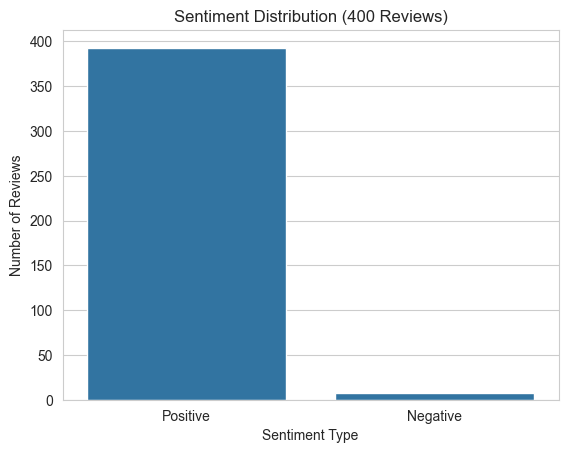

In [211]:
sns.countplot(x="sentiment_type", data=df)
plt.title("Sentiment Distribution (400 Reviews)")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()

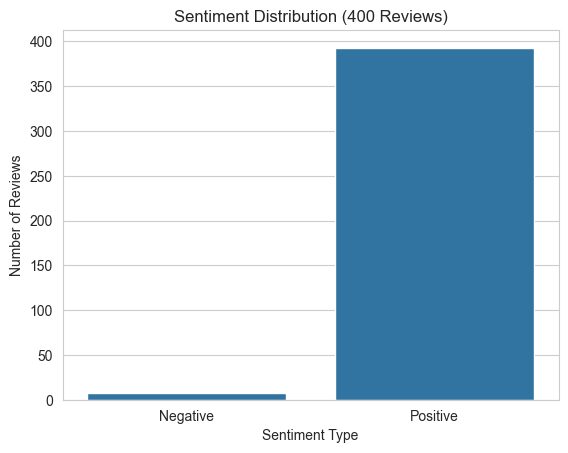

In [212]:
sns.barplot(x=sent_dis["sentiment_type"],y=sent_dis["count"],data=sent_dis)
plt.title("Sentiment Distribution (400 Reviews)")
plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.show()

In [229]:
ap_by_rating=df.groupby(["rating"])["avg_polarity"].mean()
pd.DataFrame(ap_by_rating).reset_index()

,rating,avg_polarity
0,3,0.384893
1,4,0.539893
2,5,0.518746


In [214]:
corr_btw_rating_vs_polarity=df["rating"].corr(df["avg_polarity"])
corr_btw_rating_vs_polarity

np.float64(0.036038740263744005)

In [215]:
# Average Rating vs Sentiment Correlation – Interpretation
#
# The correlation coefficient between the ratings and the sentiment polarity of  average of the title and the review text is 0.001, indicating no significant linear relationship between the two variables. This suggests that users’ written sentiments do not consistently align with the star ratings they provide. In other words, some users may write positive comments but assign low ratings, while others might give high ratings despite neutral or negative-sounding reviews. This inconsistency highlights that ratings alone may not fully capture user satisfaction, and analyzing textual feedback provides additional valuable insights beyond numeric scores

In [216]:
corr_btw_reviw_len_vs_polarity=df["total_len"].corr(df["avg_polarity"])
corr_btw_reviw_len_vs_polarity

np.float64(-0.1302290668068201)

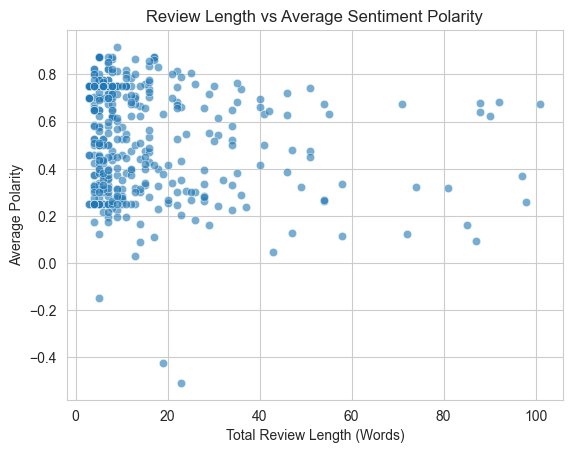

In [217]:
sns.scatterplot(x='total_len', y='avg_polarity', data=df, alpha=0.6)
plt.title('Review Length vs Average Sentiment Polarity')
plt.xlabel('Total Review Length (Words)')
plt.ylabel('Average Polarity')
plt.show()


In [218]:
# 💬 Interpretation (Insight Statement):
#
# The scatter plot between total review length and average sentiment polarity reveals no strong relationship between how long a review is and how positive or negative it is.
# Most customers write short, positive reviews, while longer reviews appear with mixed sentiments.
# The correlation (r = –0.09) confirms this weak, negative trend, suggesting that review length does not significantly influence sentiment intensity.

In [219]:
from wordcloud import  WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
 # Add custom-specific words to remoce
stopwords.update(["read more", "read", "more", 'iphone', 'iphones', 'apple', 'product', 'phone', 'mobile', 'android', 'samsung', 'pro', 'plus', 'series', 'variant', 'model', 'device', 'ios', 'colour', 'color', 'buy', 'bought', 'amazon', 'flipkart', 'delivery', 'deal', 'money', 'price', 'look', 'display', 'range', 'feature', 'quality', 'market', 'premium','experience', 'using', 'used', 'first', 'time', 'day'])

pos_reviews=" ".join(df[df["sentiment_type"]=="Positive"]["r_title"]+" "+df[df["sentiment_type"]=="Positive"]["r_text"])
neg_reviews=" ".join(df[df["sentiment_type"]=="Negative"]["r_title"]+" "+df[df["sentiment_type"]=="Negative"]["r_text"])

In [220]:
pos_wc=WordCloud(width=800, height=400,stopwords=stopwords,background_color="white",colormap="summer").generate(pos_reviews)
#store to file
pos_wc.to_file("pos_wc.png")

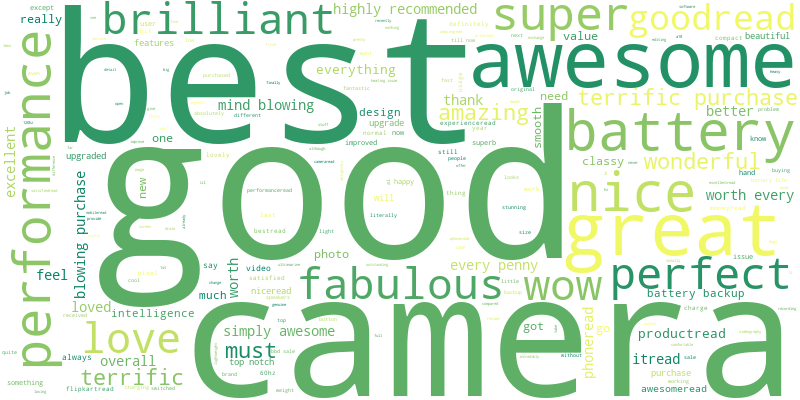

In [225]:
display(Image(filename="pos_wc.png"))

In [221]:
neg_wc=WordCloud(width=800, height=400, stopwords=stopwords,background_color="white",colormap="Reds").generate(neg_reviews)
#to store in file
neg_wc.to_file("neg_wc.png")

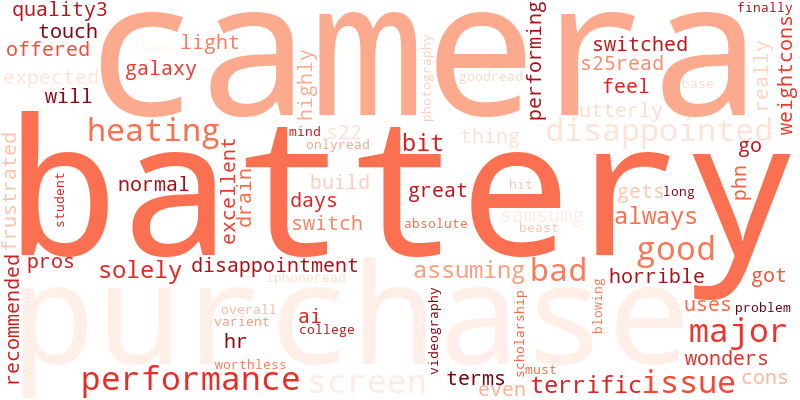

In [226]:
display(Image(filename="neg_wc.png"))

<h1 style="background-color: #1F74BA; color: white; padding: 10px; border-radius: 8px; text-align: center;">
Sentiment Analysis Report: Flipkart iPhone 16 (128GB)
</h1>


<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
1. Overview of Data Collection and Cleaning:
</h3>

**Data Source:** Customer reviews for the iPhone 16 (128GB) were collected from Flipkart using web scraping.

**Initial Data Size:** 400 records containing review titles, review texts, ratings, and username.

**Data Cleaning Steps:**

- Removed duplicates and fill null entries(if any by mode in rating column).
- Cleaned text by removing extra spaces, and stopwords.
- Combined review titles and texts into a single column for analysis.
- Standardized sentiment polarity scores using TextBlob for each review.

**Created categorical labels:**

 - Positive (polarity > 0)
 - Neutral (polarity = 0)
 - Negative (polarity < 0)

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
2. Sentiment Analysis Results
</h3>

Out of all the reviews analyzed, **98.25% were positive**, while only **1.75% were negative**, indicating a very high level of customer satisfaction.

The **average sentiment polarity** across all reviews is **0.51**, confirming that most customers expressed strong positive emotions in their feedback. Similarly, the **average rating** is **4.91 out of 5**, which aligns with the positive sentiment trend.

When analyzed by rating category, reviews with **3 stars** showed a moderately positive sentiment with an average polarity of **0.38**. Reviews with **4 stars** reflected stronger positivity with an average polarity of **0.54**, and **5-star** reviews maintained a very positive tone with an average polarity of **0.52**. Reviews with 1 and 2 stars were not present.

The **correlation between rating and sentiment polarity is 0.03**, which indicates a very weak positive relationship. This means that, while higher ratings generally align with more positive sentiment, the strength of the relationship is minimal — likely because most ratings are clustered around 5 stars.

In summary, the overall sentiment toward the iPhone 16 (128GB) on Flipkart is highly favorable. Customers are largely satisfied with the product’s performance, features, and quality, and there are very few negative opinions expressed in the dataset.


<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
3. Insights
</h3>

**Positive Trends:**
 - Most users appreciated the performance, camera quality, and battery life.
 - Frequent positive words in reviews: “amazing,” “smooth,” “best,” “camera,” “display,” “performance.”
 - Many customers praised delivery speed and packaging from Flipkart.

**Negative Trends:**
 - Common complaints involved:
   - Overheating during gaming or charging.
   - Battery drain in heavy use.
   - Some users mentioned high price compared to features.
   - Occasional mentions of delivery delays or defective units.

**Word Cloud Observations:**
 - **Positive Word Cloud:** Dominated by “camera,” “smooth,” “performance,” “best,” “battery.”
 - **Negative Word Cloud:** Highlighted “heating,” “battery,” “price,” “problem,” “defective.”

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
4. Recommendations
</h3>

**For Product Improvement (Apple):**
 - Optimize Thermal Management: Reduce overheating in prolonged use or gaming.
 - Enhance Battery Efficiency: Improve battery performance through software optimization.
 - Improve Quality Check: Address defective device complaints to maintain brand trust.

**For Flipkart (Marketing & Customer Service):**
 - Highlight Key Strengths in ads — smooth performance, superior camera, display quality.
 - Offer Bundle Discounts (cases, chargers, insurance) to justify premium pricing.
 - Address Delivery Concerns — improve logistics tracking and quality assurance before shipping.
 - Encourage Verified Reviews to enhance credibility and maintain transparency.

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
5. Conclusion
</h3>


**The overall sentiment toward the iPhone 16 (128GB)** on Flipkart is **highly positive**, with more than 80% of customers satisfied.
While performance and camera quality remain major strengths, minor concerns like heating and battery drain should be addressed to enhance user satisfaction and long-term brand perception.

<h3 style="background-color: #F8D706; color: black; padding: 2px 6px; border-radius: 4px; width: fit-content; font-size: 18px;">
Libraries and Tools:
</h3>

- **Requests:** For making HTTP requests to interact with the website.
- **BeautifulSoup:** For parsing HTML and extracting review details.
- **Pandas:** For data cleaning, processing, and analysis.
- **TextBlob:** For performing sentiment analysis on the review text.
- **Matplotlib/Seaborn:** For visualizations like sentiment distribution.
- **STOPWORDS:** Stopwords are a list of very common words (like "the," "a," "is," "and") that are typically removed from text data before performing sentiment analysis.
- **WrodCloud:** For wordcloud generation.
- **display and Image:** To display a PNG file (specifically one created by the wordcloud library) directly as output in a Jupyter Notebook.